In [107]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Dependencies

In [108]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


### 2. Imports

In [109]:
import os
import sys
import pathlib

# Add the src directory to the path
sys.path.insert(0, str(pathlib.Path('src')))

In [145]:
from constants import DEFAULT_LOG_PATH, Models, MODELS_COST
from openai_cost_tracker_viz import OpenAICostTrackerViz
from openai_cost_tracker_utils import OpenAICostTrackerUtils
from openai_cost_tracker import ClientType, OpenAICostTracker

### 3. Set API key environment variable

In [146]:
# Export the proper environment variables based on the client you are using.

# OpenAI API Key
os.environ["OPENAI_ORGANIZATION"] = OpenAICostTrackerUtils.get_api_key(path='openai_organization.txt')
os.environ["OPENAI_API_KEY"] = OpenAICostTrackerUtils.get_api_key(path='openai_api_key.txt')

# Azure OpenAI API Key
os.environ["AZURE_OPENAI_KEY"] = OpenAICostTrackerUtils.get_api_key('azure_openai_key.txt')

### 4. Input Arguments

In [147]:
experiment_name = "Demo"
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the euro 2020?"},
]
client_type = ClientType.OPENAI
model = Models.TURBO_3_5
input_cost = MODELS_COST[model.value]["input"]
output_cost = MODELS_COST[model.value]["output"]
cost_upperbound = 2
log_folder = DEFAULT_LOG_PATH

In [148]:
model = Models.AZURE_3_5_TURBO
client_type = ClientType.AZURE
client_args = {
    "azure_endpoint": "https://key-2-loc2.openai.azure.com/",
    "api_key": os.getenv("AZURE_OPENAI_KEY"),
    "api_version": "2024-02-15-preview"
}

### 5. Demo

In [149]:
# Create the OpenAICostTracker object
cost_tracker = OpenAICostTracker(
    experiment_name = experiment_name,
    client = client_type,
    model = model.value,
    input_cost = input_cost,
    output_cost = output_cost,
    log_folder = log_folder,
    cost_upperbound = cost_upperbound,
    client_args = client_args
)

In [150]:
# Run the chat completion
cost_tracker.chat_completion(messages, api_args={"max_tokens": 100})

'Italy won the UEFA Euro 2020 tournament. They emerged as the champions by defeating England in the final match through a penalty shootout.'

### 6. Data Visualization

In [151]:
# Print the total cost
OpenAICostTrackerViz.print_total_cost(path=DEFAULT_LOG_PATH)

Total cost: 0.000895 (USD)


In [152]:
# Cost by model
OpenAICostTrackerViz.print_total_cost_by_model(path=DEFAULT_LOG_PATH)

gpt-3.5-turbo: 0.000796 (USD)
gpt-35-turbo-0125: 9.9e-05 (USD)


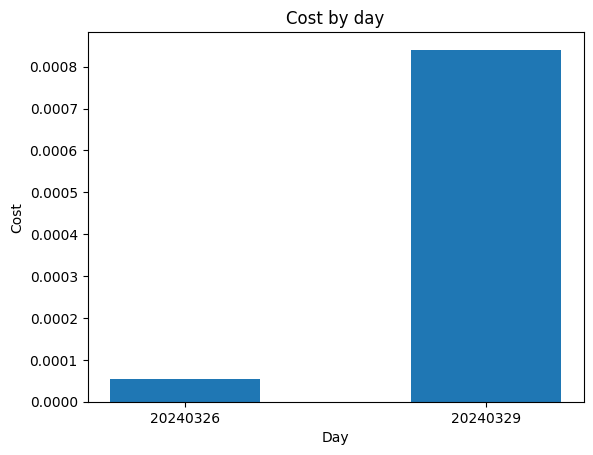

In [165]:
# Visualize the cost by day
OpenAICostTrackerViz.plot_cost_by_day(path=DEFAULT_LOG_PATH)